# Trafic Sign Recognition

### Introduction

Self driven cars have gained a lot of attention with the developpement of the Artificial Intelligence. However, a lot of domains are cosidered when we talk about these topic. 

We will consider only the study of trafic signal starting with the detection then the recognition of those signal using deep learning and python.

The data we will use in these project is available in Kaggle  [Trafic Signal](https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)

### Installing the required Library

In [2]:
%pip install tensorflow keras sklearn matplotlib pandas pil

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil


### Data Exploration

The data available is divided into training and testing data .The testing data is grouped into 43 classes ,each class represent the type of the trafic signal.

#### Import Library 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [4]:
cur_path=os.getcwd()
print(cur_path)

c:\Users\hafsa\OneDrive\Documents\GitHub\TraficSignRecognition-CNN-and-Keras-


In [9]:
data=[]
labels=[]
classes=43 
cur_path=os.getcwd()
print(cur_path)
for i in range(classes):
    path=os.path.join(cur_path,'train',str(i))
    
    images=os.listdir(path)
    for a in images :
        try:
            image = Image.open(path + '\\'+ a)
            
            image=image.resize((30,30))
            
            image = np.array(image) 
            data.append(image) 
            labels.append(i) 
        except:
            print("Error Loading image",i)
            
data=np.array(data)
labels=np.array(labels)

c:\Users\hafsa\OneDrive\Documents\GitHub\TraficSignRecognition-CNN-and-Keras-


In [10]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


The shape of our data is () where the is the number of images in the data ,the (30,30) is the size of the images and the 3 stand for the RGB values of each pixels of the image.

In [11]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train,y_test)

(31367, 30, 30, 3) (7842, 30, 30, 3) [36 28  2 ... 39  1 10] [26 15 13 ...  8  7 20]


Convert the lables into one Hot encoder

In [12]:
y_train , y_test=to_categorical(y_train,43),to_categorical(y_test,43)


### CNN model 

#### The Architecture of the Model

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Model Training and Validation


In [17]:
epochs = 15
anc = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 38s 38ms/step - loss: 1.9687 - accuracy: 0.5020 - val_loss: 0.5372 - val_accuracy: 0.8675
Epoch 2/15
981/981 [==============================] - 41s 42ms/step - loss: 0.6487 - accuracy: 0.8111 - val_loss: 0.2182 - val_accuracy: 0.9394
Epoch 3/15
981/981 [==============================] - 43s 44ms/step - loss: 0.3964 - accuracy: 0.8838 - val_loss: 0.1054 - val_accuracy: 0.9714
Epoch 4/15
981/981 [==============================] - 41s 42ms/step - loss: 0.3114 - accuracy: 0.9132 - val_loss: 0.0995 - val_accuracy: 0.9730
Epoch 5/15
981/981 [==============================] - 41s 42ms/step - loss: 0.2673 - accuracy: 0.9242 - val_loss: 0.0683 - val_accuracy: 0.9807
Epoch 6/15
981/981 [==============================] - 40s 41ms/step - loss: 0.2337 - accuracy: 0.9335 - val_loss: 0.0597 - val_accuracy: 0.9828
Epoch 7/15
981/981 [==============================] - 40s 40ms/step - loss: 0.2197 - accuracy: 0.9388 - val_loss: 0.0672 - val_accuracy:

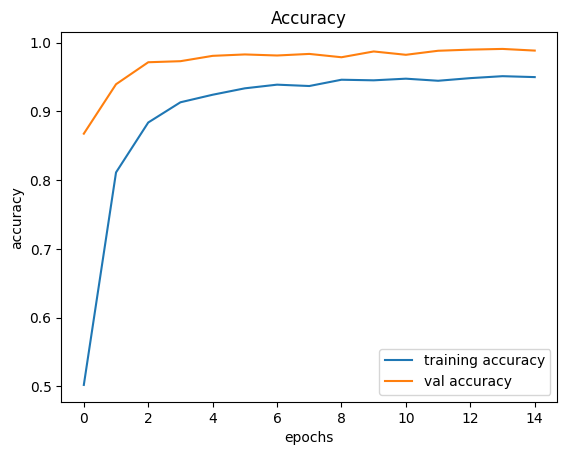

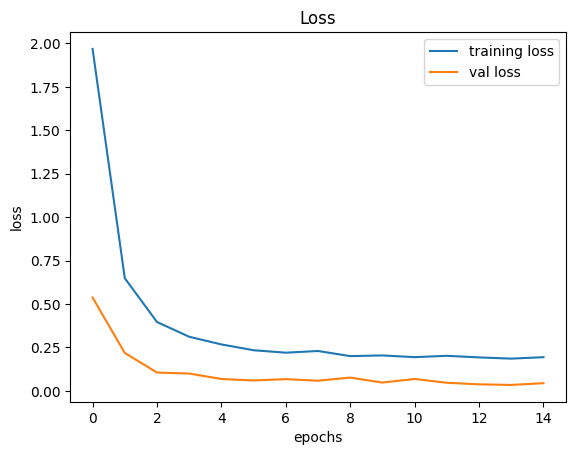

In [29]:
#plotting graphs for accuracy

model.save("my_model.h5")
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()